In [1]:
# Problem 1
import numpy as np

# Parameters
beta_0 = 10.0
beta_1 = 0.5
sigma = 1.0
X_fixed = 2
mean_Y_given_X = beta_0 + beta_1 * X_fixed

# Number of simulations
num_simulations = 1000000

# Simulate Y given X = 2
Y_simulated = np.random.normal(loc=mean_Y_given_X, scale=sigma, size=num_simulations)

# Calculate the probability P(Y > 10 | X = 2)
prob_Y_greater_than_10 = np.mean(Y_simulated > 10)

print(f"Probability that Y > 10 given X = 2: {prob_Y_greater_than_10}")

Probability that Y > 10 given X = 2: 0.84117


In [2]:
#Problem 2 Summary Statistics
import pandas as pd

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Display summary statistics
summary = salary.describe()
print(summary)

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


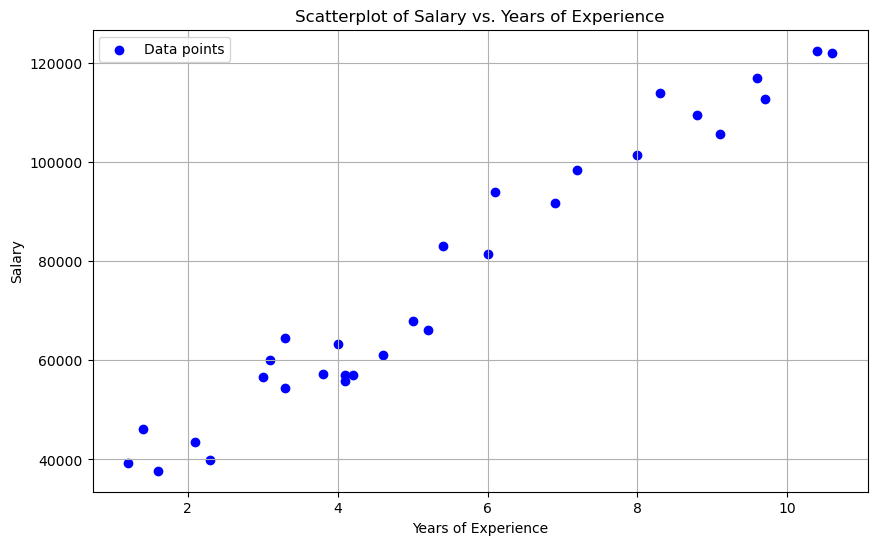

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.14e-20
Time:                        12:44:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
salary_intercept  2.485e+04   2306.654  

In [3]:
# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Problem 2A
#  Plot Salary against YearsExperience as a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(salary['YearsExperience'], salary['Salary'], color='blue', label='Data points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary vs. Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2C using statsmodels
# Fit the SLR model using LinearRegression
X = salary[['YearsExperience']]  # Predictor variable
y = salary['Salary']  # Response variable

# Add a constant to the predictor variable (intercept term)
betas = sm.add_constant(X)
betas.rename(columns={'const': 'salary_intercept'}, inplace=True)


# Create and fit the model
model = sm.OLS(y, betas).fit()

# Print the confidence intervals at 95%
print(model.summary())
print("\n95% Confidence Intervals:")
print(model.conf_int(alpha=0.05))

# Predict the value for a given x value (e.g., YearsExperience = 5)
x_value = 5
input_data = pd.DataFrame({'salary_intercept': [1], 'YearsExperience': [x_value]})
predicted_value = model.predict(input_data)
print(f"\nPredicted Salary for {x_value} years of experience: {predicted_value[0]}")
# He is earning under the predicted amount

# Predict the value and confidence interval for 10 years of experience
input_data_10 = pd.DataFrame({'salary_intercept': [1], 'YearsExperience': [10]})
prediction_10 = model.get_prediction(input_data_10)
prediction_summary_10 = prediction_10.summary_frame(alpha=0.05)
print(prediction_summary_10)
predicted_value_10 = prediction_summary_10['mean'][0]
conf_int_10 = prediction_summary_10[['mean_ci_lower', 'mean_ci_upper']].iloc[0]

print(f"\nPredicted Salary for {10} years of experience: {predicted_value_10}")
print(f"95% Confidence Interval for the prediction: ({conf_int_10['mean_ci_lower']}, {conf_int_10['mean_ci_upper']})")

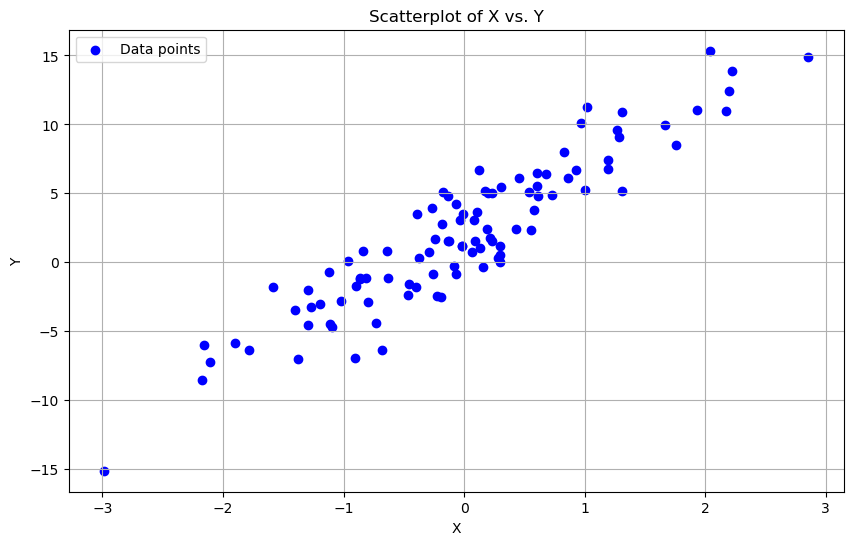

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     584.2
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.44e-43
Time:                        12:44:28   Log-Likelihood:                -214.74
No. Observations:                 100   AIC:                             433.5
Df Residuals:                      98   BIC:                             438.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
b0-intercept     2.0933      0.209     10.001   

/var/folders/zw/1prw4rfn3kq_m_xh3tx6jp1h0000gn/T/ipykernel_34211/1273452228.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_estimate = model.params[1]
/var/folders/zw/1prw4rfn3kq_m_xh3tx6jp1h0000gn/T/ipykernel_34211/1273452228.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_standard_error = model.bse[1]


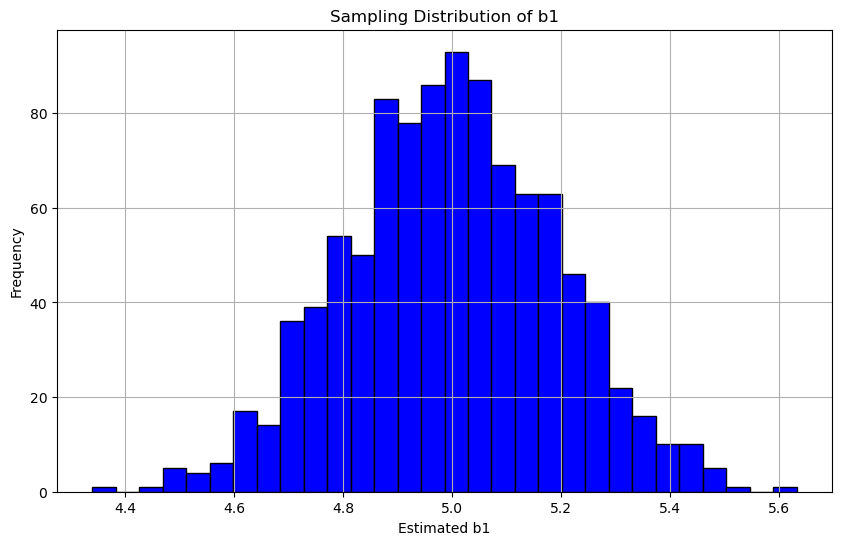

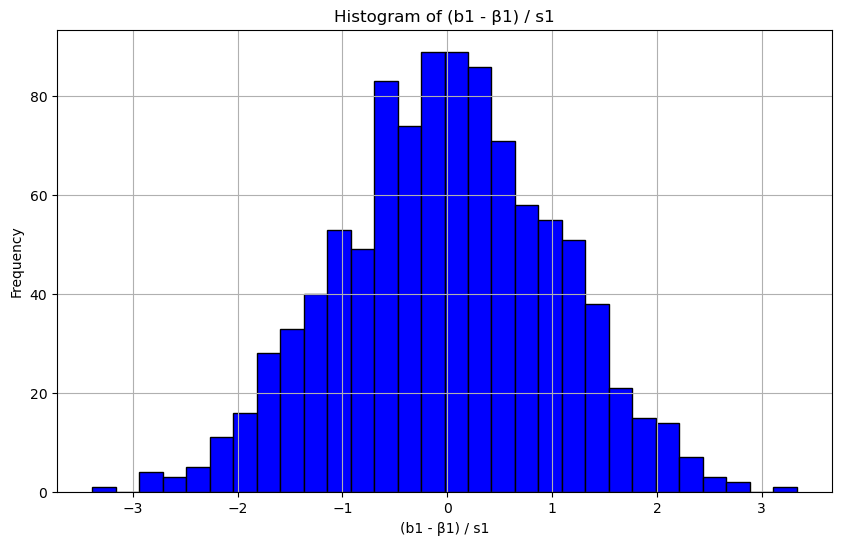

0.04989322366799912


In [4]:
# Problem 3 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Generate 100 random numbers from a standard normal distribution for X
X = np.random.normal(loc=0, scale=1, size=100)

# Define the coefficients β0 and β1
beta_0 = 2.0  # Intercept
beta_1 = 5.0  # Slope

#Generate the error term ε from a normal distribution with mean 0 and standard deviation σ
sigma = 2.0  # Standard deviation of the error term
epsilon = np.random.normal(loc=0, scale=sigma, size=100)

# Calculate the response variable Y
Y = beta_0 + beta_1 * X + epsilon

#  Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs. Y')
plt.legend()
plt.grid(True)
plt.show()

# Using statsmodels Fit the SLR model using LinearRegression
# Add a constant to the predictor variable (intercept term)
betas = sm.add_constant(X)
betas = pd.DataFrame(betas, columns=['b0-intercept', 'b1-X'])

# Create and fit the model
model = sm.OLS(Y, betas).fit()

# Print the confidence intervals at 95%
print(model.summary())

# Extract the estimate of σ^2 (s2)
s2 = model.mse_resid
print(f"Estimated σ^2 (s2): {s2}")

# Compare the estimated σ^2 with the true value
print(f"True σ^2: {sigma**2}")

# Explanation
print("The estimates are not exactly the same as the true values because the estimates are based on a finite sample of data. In practice, the observed data includes random noise, which causes the estimates to vary around the true values. The larger the sample size, the closer the estimates will be to the true values.")

# Part (b)
# Number of samples to generate
num_samples = 1000

# Vector to store the estimated b1 values
b1_estimates = []
b1_standard_errors = []
# Generate the sampling distribution of b1
for _ in range(num_samples):
    # Generate the error term ε
    epsilon = np.random.normal(loc=0, scale=sigma, size=100)
    
    # Calculate the response variable Y
    Y = beta_0 + beta_1 * X + epsilon
    
    # Create and fit the model
    model = sm.OLS(Y, betas).fit()
    
    # Extract the estimated b1 value
    b1_estimate = model.params[1]
    b1_standard_error = model.bse[1]

    b1_estimates.append(b1_estimate)
    b1_standard_errors.append(b1_standard_error)

# Plot the histogram of the estimated b1 values
plt.figure(figsize=(10, 6))
plt.hist(b1_estimates, bins=30, color='blue', edgecolor='black')
plt.xlabel('Estimated b1')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of b1')
plt.grid(True)
plt.show()

# Part (c)
# Calculate (b1 - β1) / s1 for each sample
standardized_b1 = [(b1 - beta_1) / s1 for b1, s1 in zip(b1_estimates, b1_standard_errors)]

# Plot the histogram of the standardized b1 values
plt.figure(figsize=(10, 6))
plt.hist(standardized_b1, bins=30, color='blue', edgecolor='black')
plt.xlabel('(b1 - β1) / s1')
plt.ylabel('Frequency')
plt.title('Histogram of (b1 - β1) / s1')
plt.grid(True)
plt.show()

# S1 calculation

# Calculate the sample size (n)
n = len(X)
# Calculate the variance of X (sx^2)
sx2 = np.var(X, ddof=1)

# Calculate s1
s1_2 = s2 / (n - 1) * sx2
print(s1_2)

       Unnamed: 0    velocity   distance
count   24.000000    24.00000  24.000000
mean    12.500000   924.37500  12.054583
std      7.071068   512.81396   5.814649
min      1.000000    80.00000   2.000000
25%      6.750000   616.50000   8.530000
50%     12.500000   827.00000  13.080000
75%     18.250000  1423.25000  15.870000
max     24.000000  1794.00000  21.980000


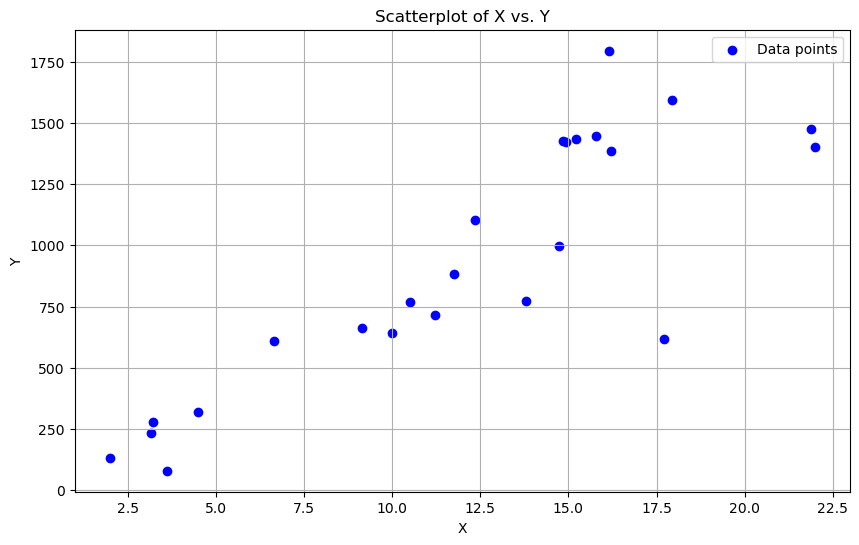

In [5]:
# Problem 5 Exploration
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the scatterplots dataset
hubble = pd.read_csv('hubble.csv')

# Display summary statistics
summary = hubble.describe()
print(summary)

y = hubble[['velocity']]  # Response variable (endog) as a DataFrame
X = hubble[['distance']]  # Predictor variable (exog) as a DataFrame

#  Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs. Y')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Problem 5 Solving
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the scatterplots dataset
hubble = pd.read_csv('hubble.csv')

y = hubble[['velocity']]  # Response variable (endog) as a DataFrame
X = hubble[['distance']]  # Predictor variable (exog) as a DataFrame

# Add a constant (intercept) to the predictor variable
betas = sm.add_constant(X)  # Adds the intercept term to the DataFrame
# Ensure that betas has exactly 2 columns (intercept and distance)
betas.columns = ['b0-intercept', 'b1-distance']  # Correct naming

# Create and fit the model using OLS
model = sm.OLS(y, betas).fit()

# Print out the model summary
print(model.summary())
# Calculate and print the 95% confidence intervals for the coefficients
conf_intervals = model.conf_int(alpha=0.05)
conf_intervals.columns = ['5%', '95%']
print("\n95% Confidence Intervals:")
print(conf_intervals)


print("")
print("---------- part b ----------")
print("")

# Function to compute the slope for a bootstrapped sample
def bootstrap_slope(data):
    # Randomly sample with replacement from the dataset
    sample_data = data.sample(n=len(data), replace=True)
    
    # Extract the response (velocity) and predictor (distance)
    y = sample_data['velocity']
    X = sample_data['distance']
    
    # Add constant (intercept) term
    X_with_const = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X_with_const).fit()
    
    # Return the slope coefficient (index 1, as the first coefficient is the intercept)
    return model.params.iloc[1]

# Perform bootstrapping to estimate the distribution of slopes
bootstrap_slopes = np.array([bootstrap_slope(hubble) for _ in range(5000)])

# Calculate the standard error from the bootstrapped slopes
se_bootstrap = np.std(bootstrap_slopes)
print(f"Bootstrap standard error: {se_bootstrap}")

# Calculate the 95% confidence interval for the slope using the provided formula
bootstrap_ci = 76 + 2 * np.array([-1, 1]) * se_bootstrap
print(f"Bootstrap 95% CI for the slope: {bootstrap_ci}")

# Compare with the 95% CI obtained from the model summary
print(f"Model 95% CI for the slope: {conf_intervals.loc['b1-distance']}")

                            OLS Regression Results                            
Dep. Variable:               velocity   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     64.30
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           5.68e-08
Time:                        12:44:29   Log-Likelihood:                -166.90
No. Observations:                  24   AIC:                             337.8
Df Residuals:                      22   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
b0-intercept     6.6963    126.557      0.053   

In [7]:
# Problem 6